# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [84]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



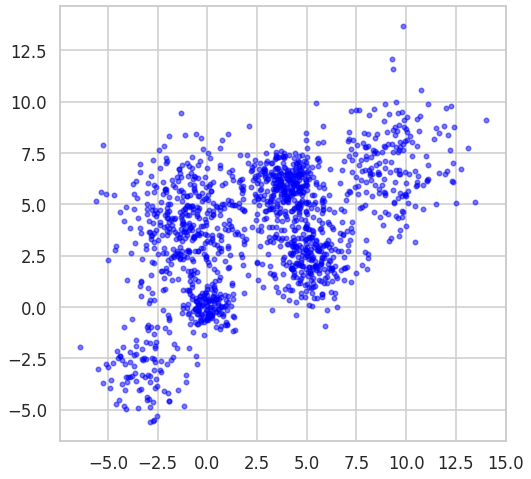

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

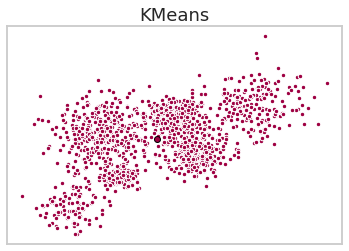

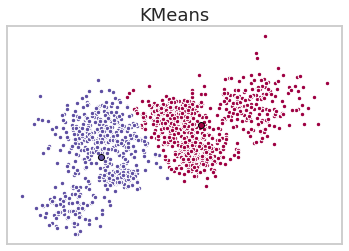

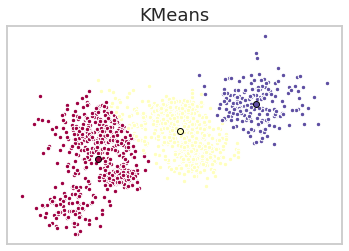

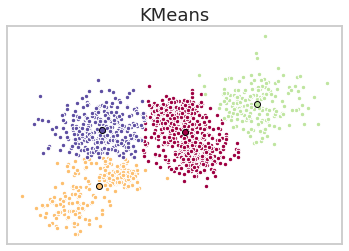

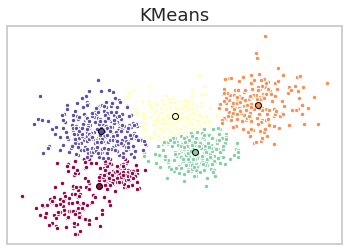

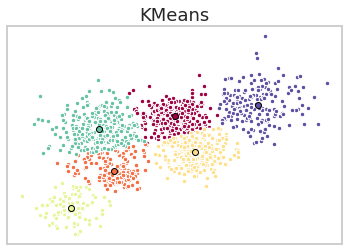

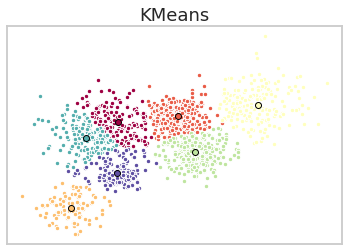

Best Silhouette Score: 0.486


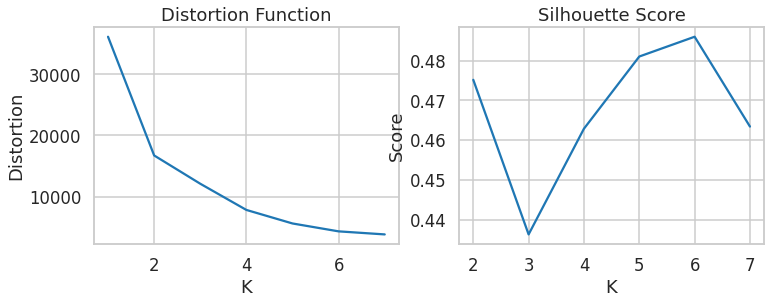

In [85]:
dist_k = np.array([])
silo_k = np.array([])

for i in range(1, 8):

    k_means = KMeans(init="k-means++", n_clusters=i, n_init=12)
    k_means.fit(Multi_blob_Data)
    k_means_labels = k_means.labels_
    k_means_cluster_centers = k_means.cluster_centers_
    dist_k = np.append(dist_k, k_means.inertia_)
    if i > 1:
        silo_k = np.append(silo_k, silhouette_score(Multi_blob_Data, k_means_labels))
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(1, 1, 1)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
    for k, col in zip(range(len(k_means_cluster_centers)), colors):
        my_members = (k_means_labels == k)
        cluster_center = k_means_cluster_centers[k]
        ax.plot(Multi_blob_Data[my_members, 0], Multi_blob_Data[my_members, 1], 'w', markerfacecolor=col, marker='.')
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    ax.set_title('KMeans')
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()
###########################################################################################################################################################################################
#The Distortion function

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

K = np.arange(1, 8)
ax[0].plot(K, dist_k)
ax[0].set_title('Distortion Function')
ax[0].set_xlabel('K')
ax[0].set_ylabel('Distortion')
ax[1].plot(K[1:], silo_k)
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('K')
ax[1].set_ylabel('Score')
best_silo = silo_k[np.argmax(silo_k)]
print(f'Best Silhouette Score: {best_silo:.3f}')

plt.show()


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

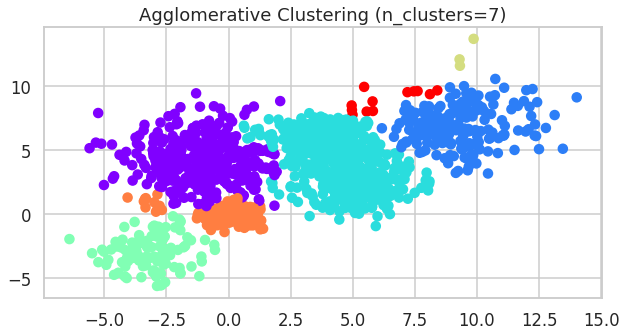

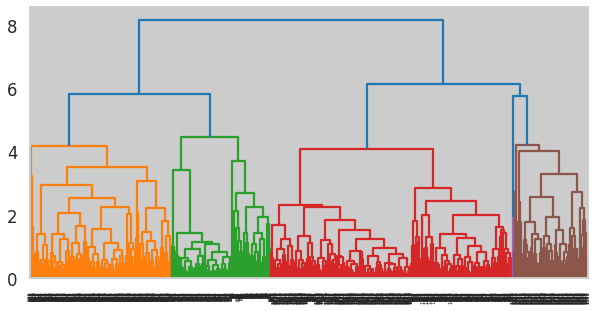

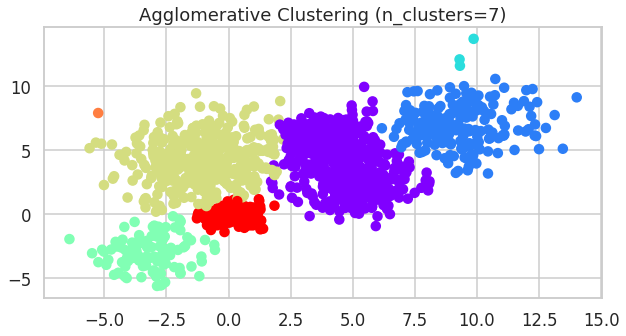

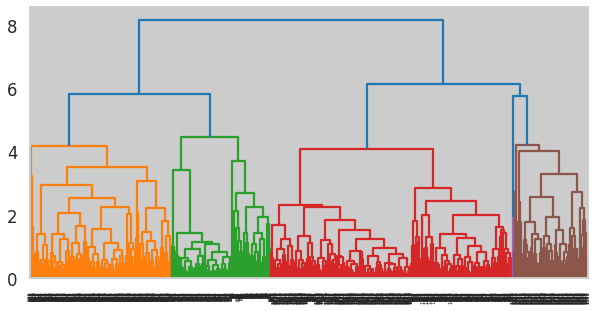

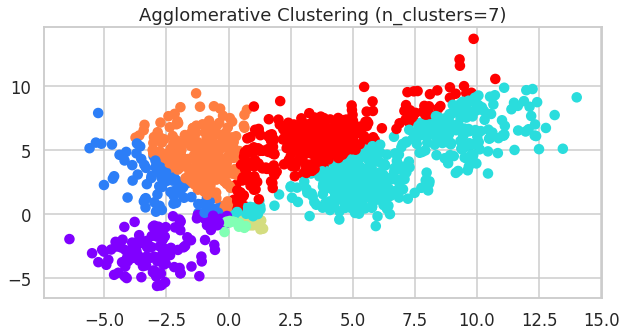

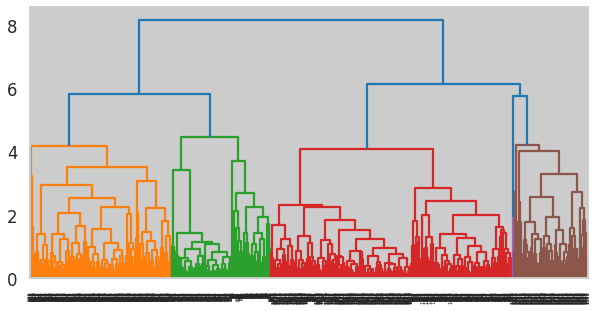

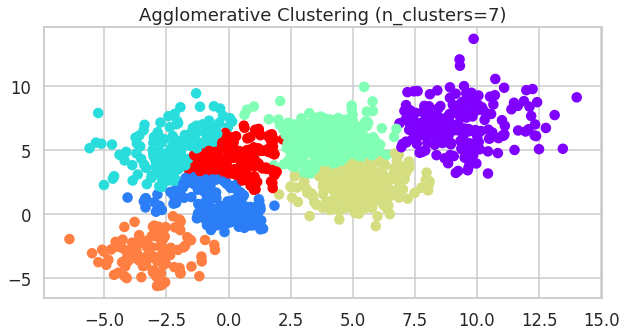

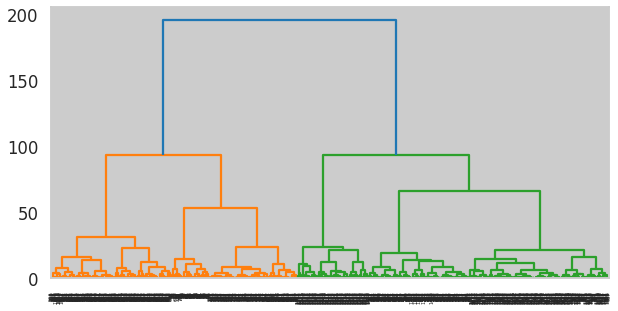

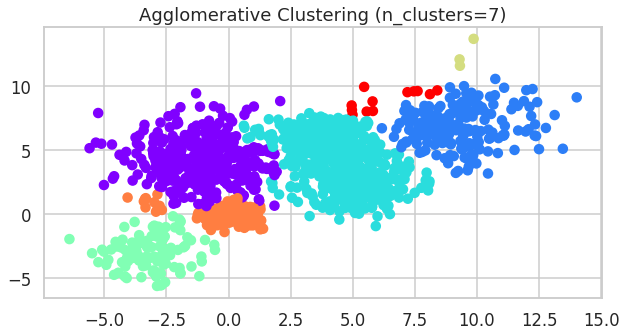

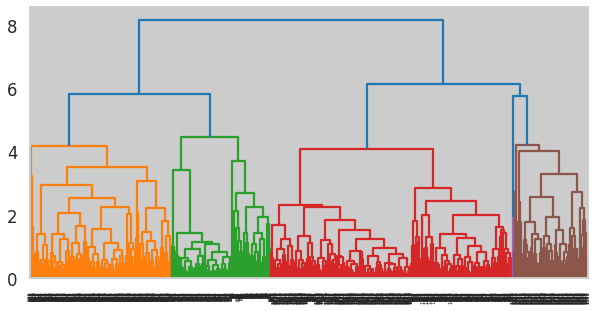

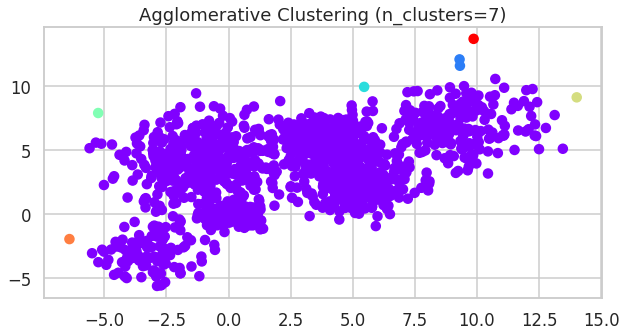

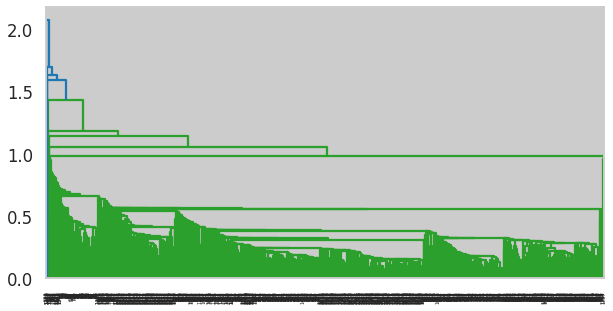

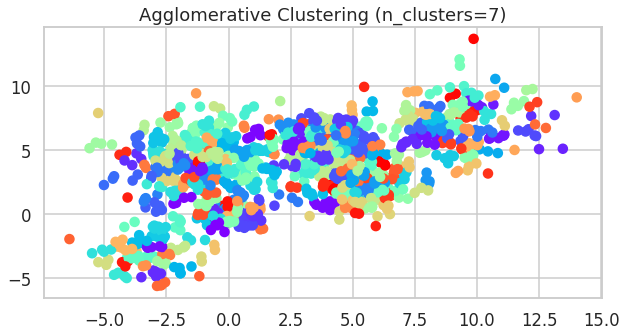

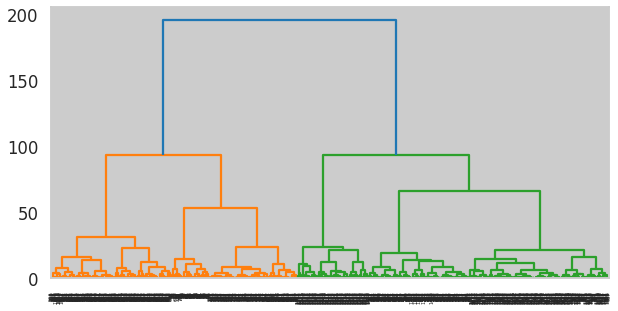

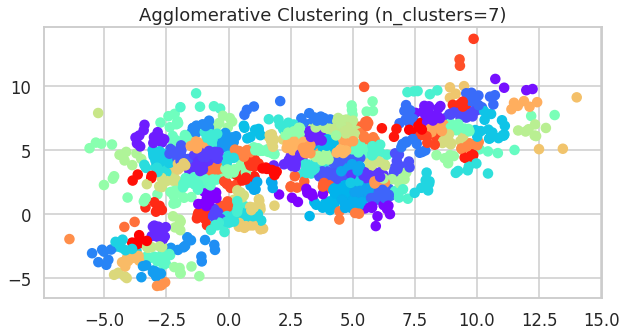

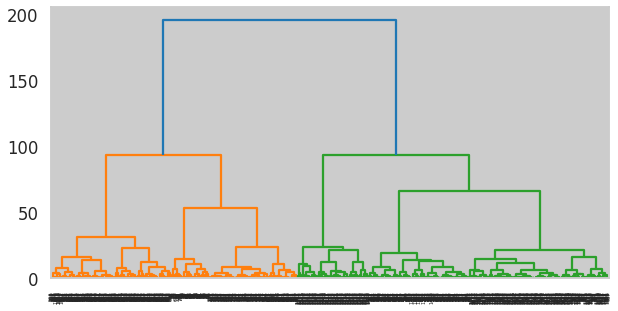

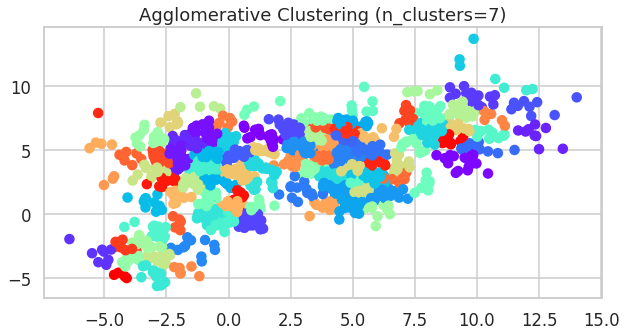

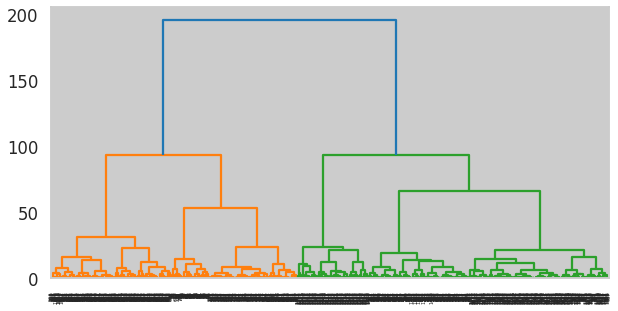

In [90]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

aff = ['euclidean', 'manhattan', 'cosine']
link = ['ward', 'average', 'single']
dist = [1.0, 2.0, 3.0]

def display_cluster_agglomerative(data, model, n_clusters):
    plt.figure(figsize=(10, 5))
    plt.scatter(data[:, 0], data[:, 1], c=model.labels_, cmap='rainbow')
    plt.title(f"Agglomerative Clustering (n_clusters={n_clusters})")

sil_agglomerative_aff = []
agglomerative_aff = []

for i in aff:
    agglomerative = AgglomerativeClustering(n_clusters=7, affinity=i, linkage='average')
    agglomerative.fit(Multi_blob_Data)
    labels = agglomerative.labels_
    no_clusters = len(np.unique(agglomerative.labels_))-1
    if no_clusters > 1:
        agglomerative_aff.append(i)
        sil_agglomerative_aff.append(silhouette_score(Multi_blob_Data, agglomerative.labels_))

    display_cluster_agglomerative(Multi_blob_Data, agglomerative, 7)
    Z = linkage(Multi_blob_Data, method='average')
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.show()

sil_agglomerative_link = []
agglomerative_link = []

for j in link:
    agglomerative = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage=j)
    agglomerative.fit(Multi_blob_Data)
    labels = agglomerative.labels_
    no_clusters = len(np.unique(agglomerative.labels_))-1
    if no_clusters > 1:
        agglomerative_link.append(j)
        sil_agglomerative_link.append(silhouette_score(Multi_blob_Data, agglomerative.labels_))
    
    display_cluster_agglomerative(Multi_blob_Data, agglomerative, 7)
    Z = linkage(Multi_blob_Data, method=j)
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.show()

sil_agglomerative_dist = []
agglomerative_dist = []

for k in dist:
    agglomerative = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=k)
    agglomerative.fit(Multi_blob_Data)
    labels = agglomerative.labels_
    no_clusters = len(np.unique(agglomerative.labels_))-1
    if no_clusters > 1:
        agglomerative_dist.append(k)
        sil_agglomerative_dist.append(silhouette_score(Multi_blob_Data, agglomerative.labels_))
    
    display_cluster_agglomerative(Multi_blob_Data, agglomerative, 7)
    Z = linkage(Multi_blob_Data, method='ward')
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.show()


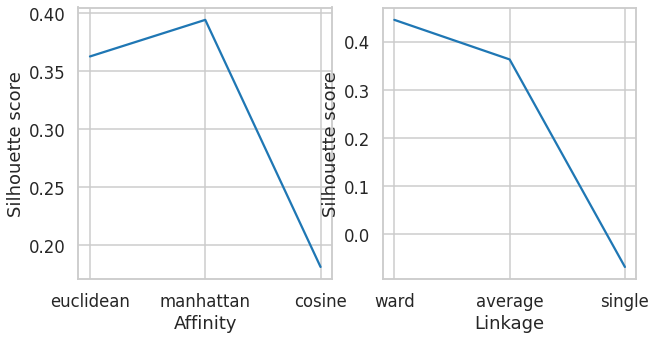

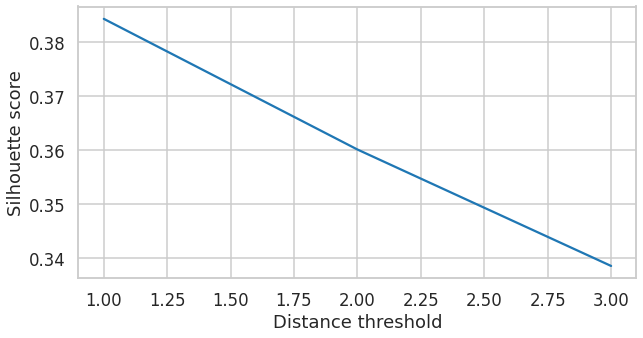

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(agglomerative_aff,sil_agglomerative_aff)
ax2.plot(agglomerative_link,sil_agglomerative_link)

ax1.set_xlabel('Affinity')
ax1.set_ylabel('Silhouette score')
ax2.set_xlabel('Linkage')
ax2.set_ylabel('Silhouette score')
plt.show()
fig,ax3=plt.subplots(1,figsize=(10,5))
ax3.plot(agglomerative_dist,sil_agglomerative_dist)
ax3.set_xlabel('Distance threshold')
ax3.set_ylabel('Silhouette score')
plt.show()

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

Total number of clusters: 0


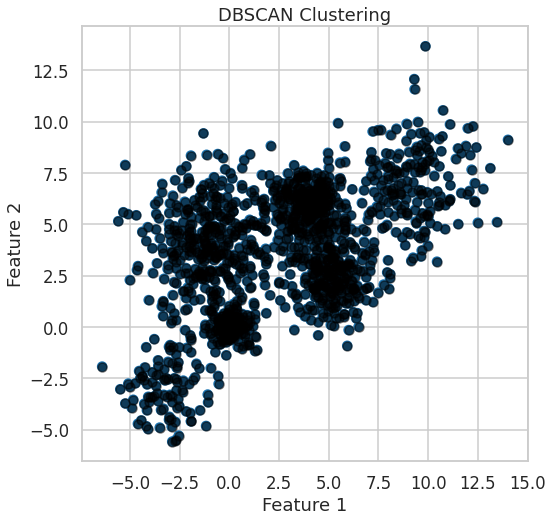

Total number of clusters: 1


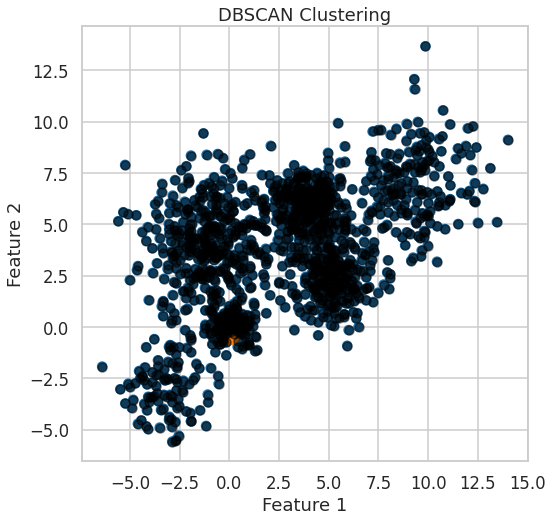

Total number of clusters: 2


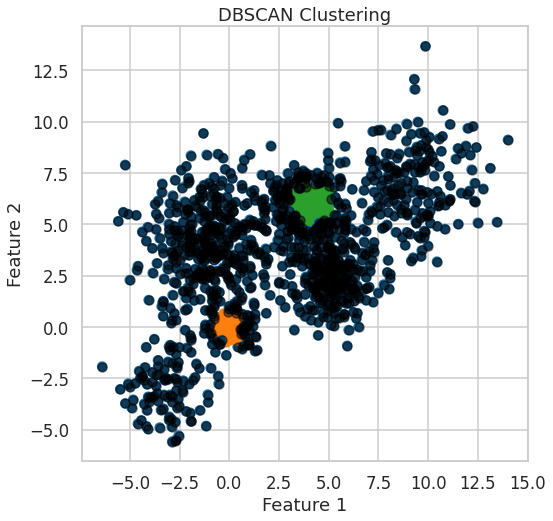

Total number of clusters: 6


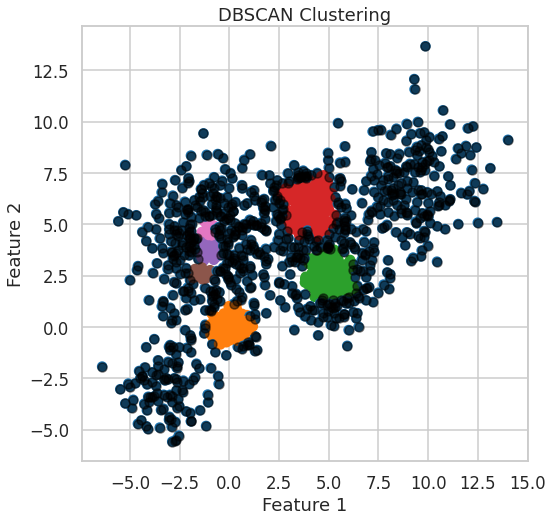

Total number of clusters: 4


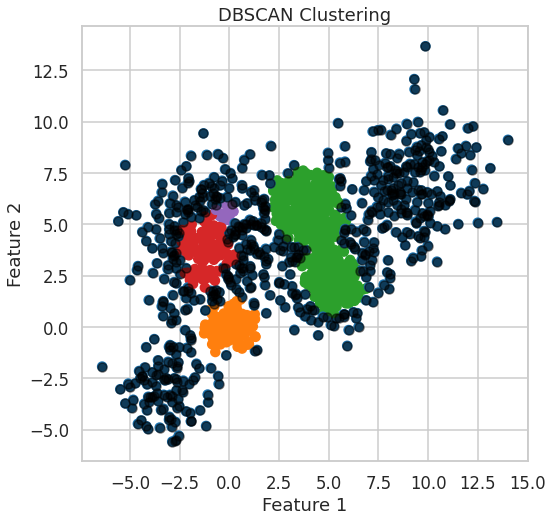

Total number of clusters: 5


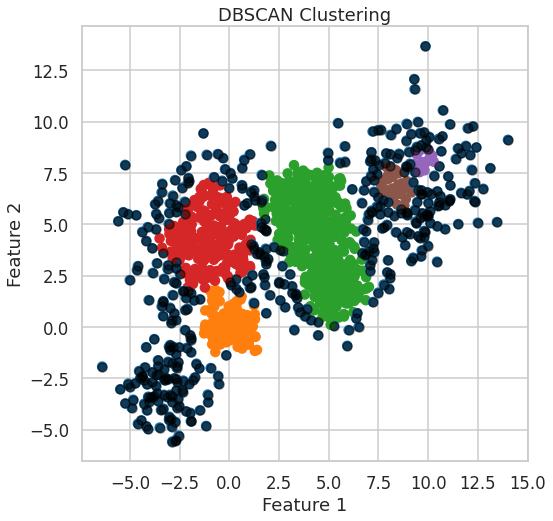

Total number of clusters: 4


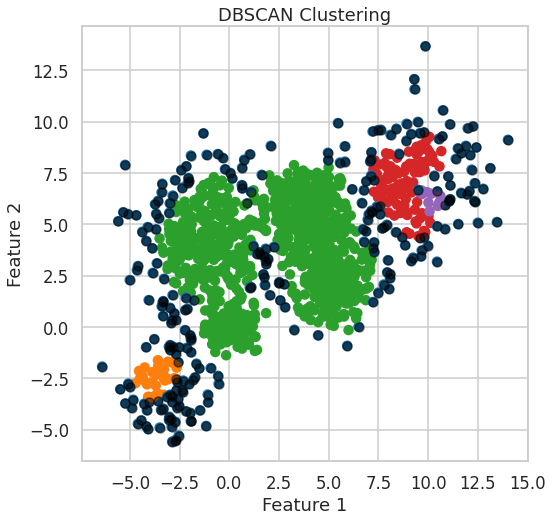

Total number of clusters: 3


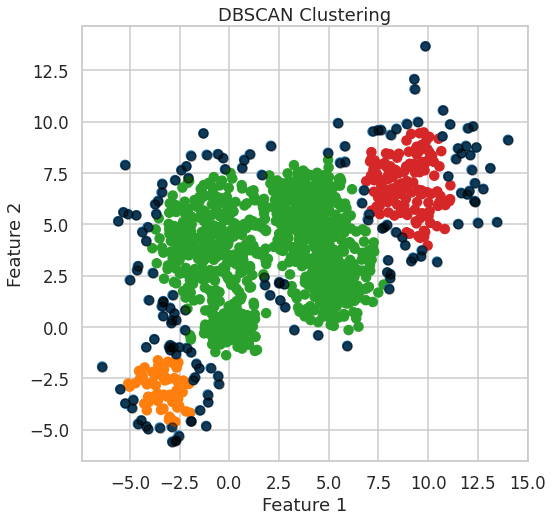

Total number of clusters: 3


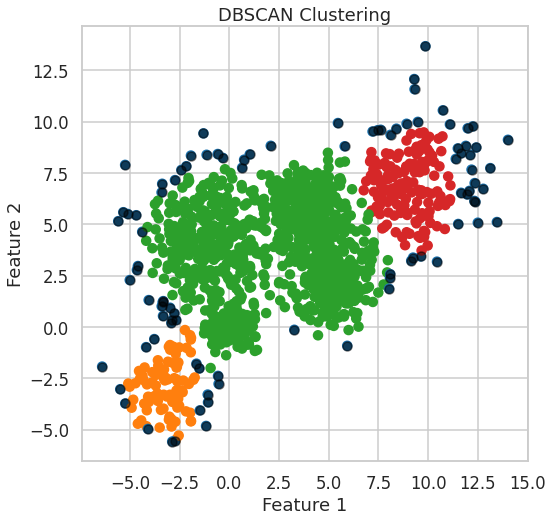

Total number of clusters: 2


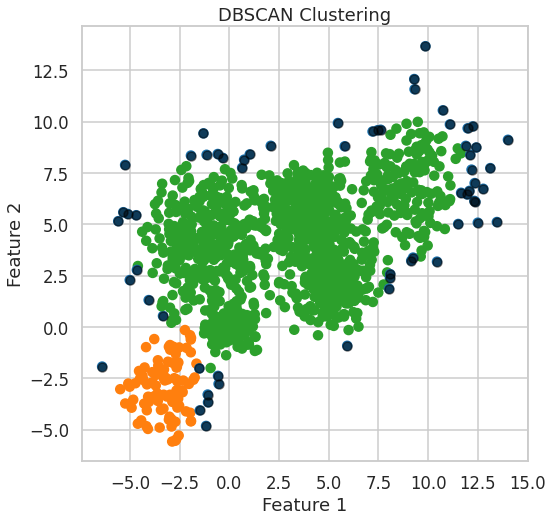

Total number of clusters: 1


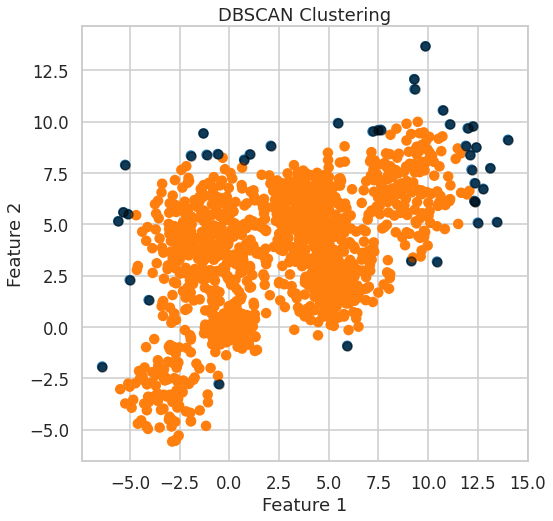

Total number of clusters: 1


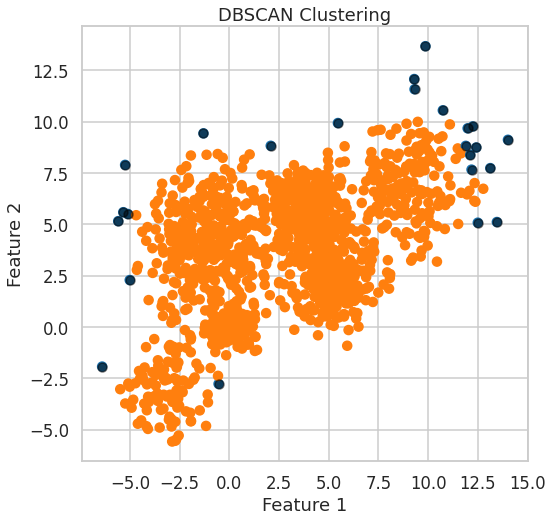

Total number of clusters: 1


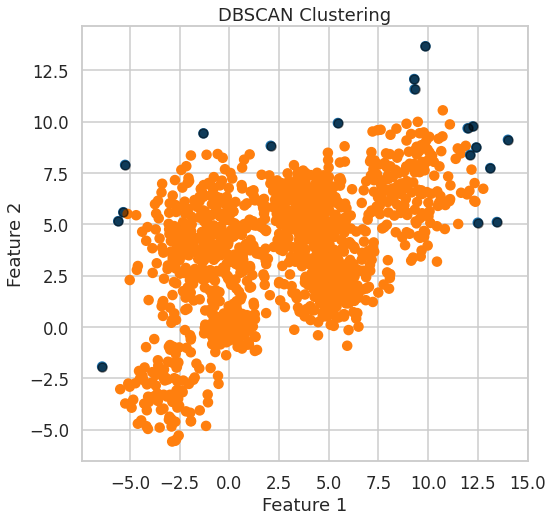

Total number of clusters: 1


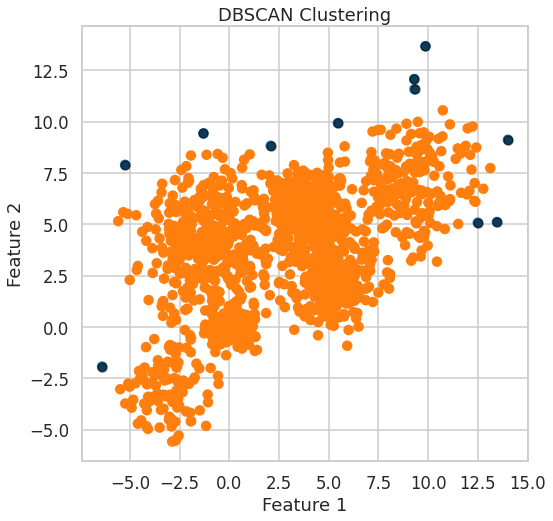

Total number of clusters: 1


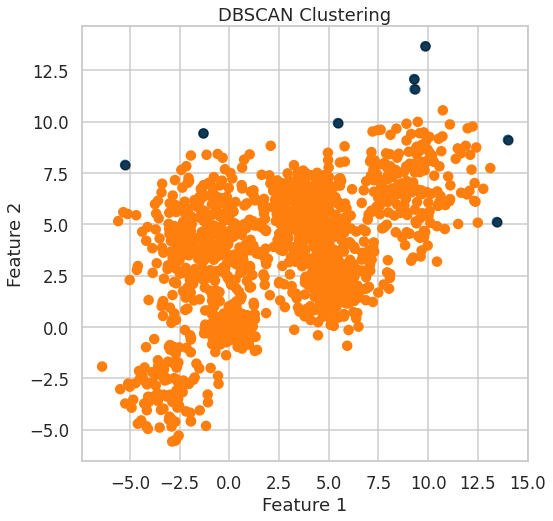

Total number of clusters: 1


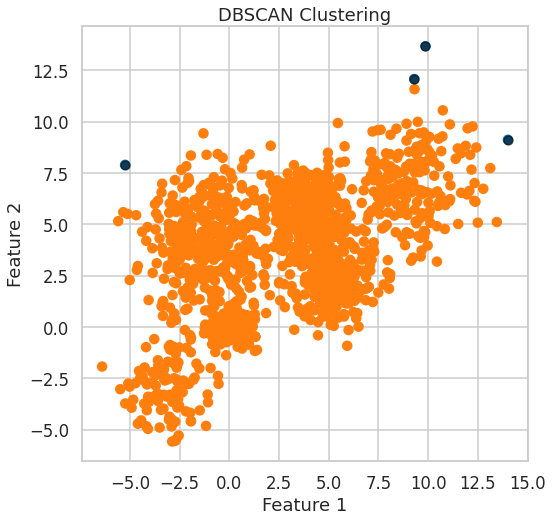

Total number of clusters: 1


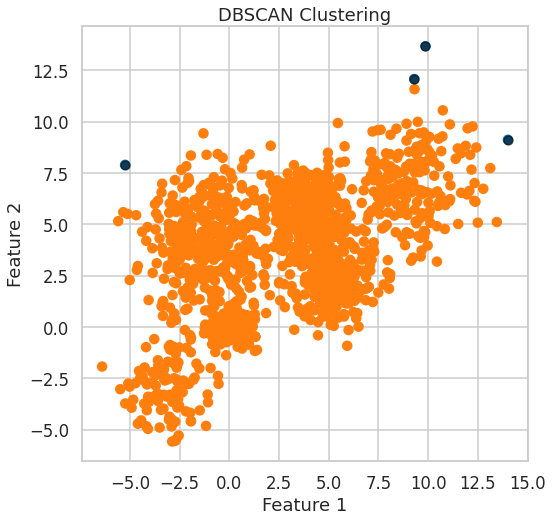

Total number of clusters: 1


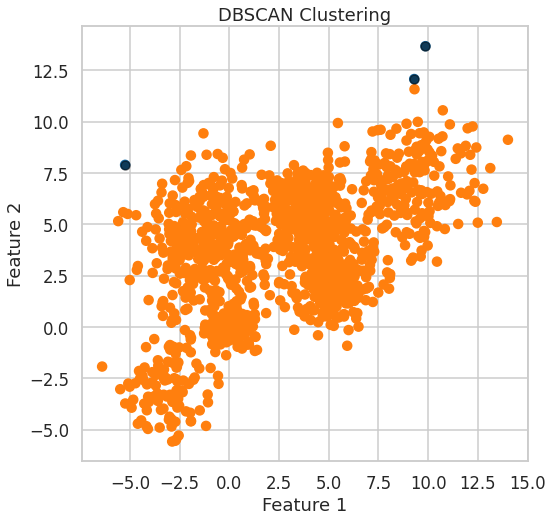

Total number of clusters: 1


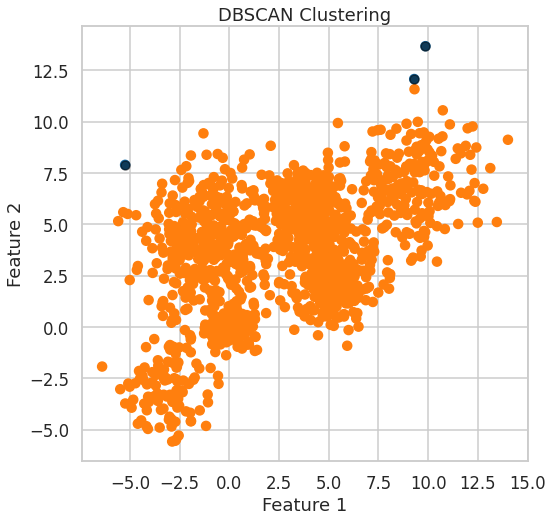

Total number of clusters: 1


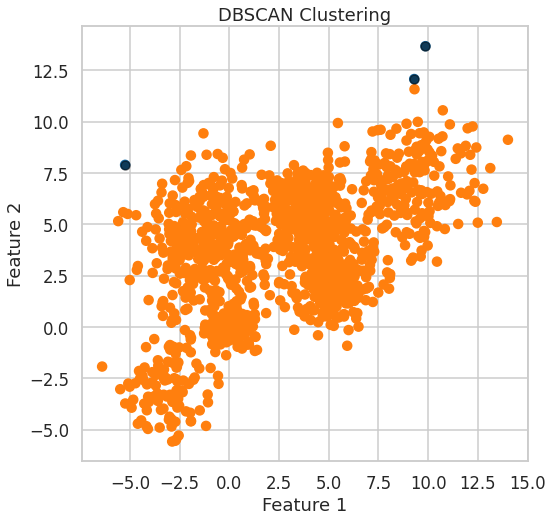

Total number of clusters: 1


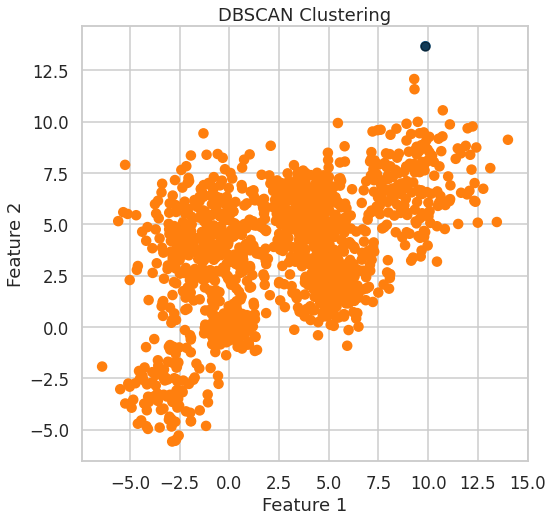

Total number of clusters: 1


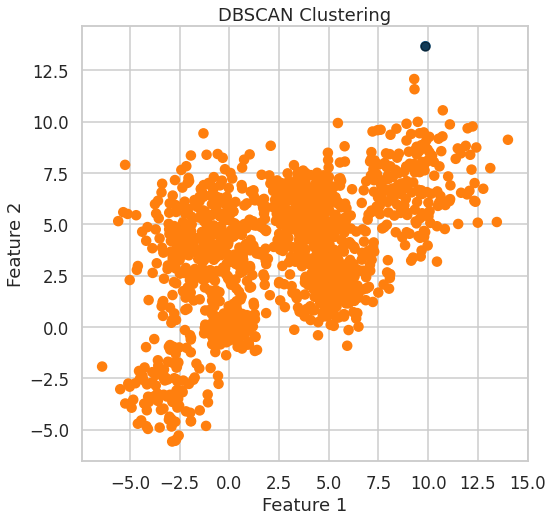

Total number of clusters: 1


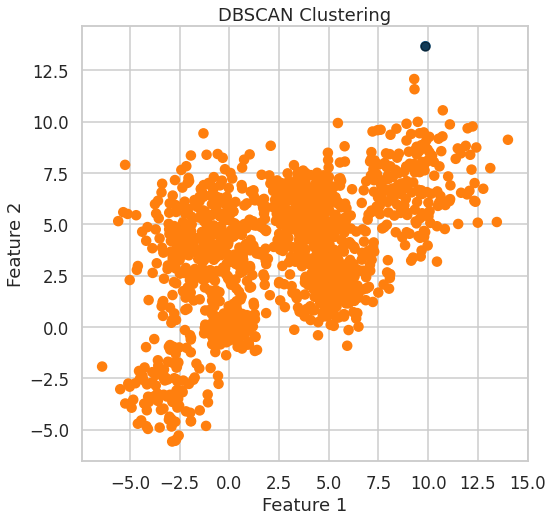

Total number of clusters: 1


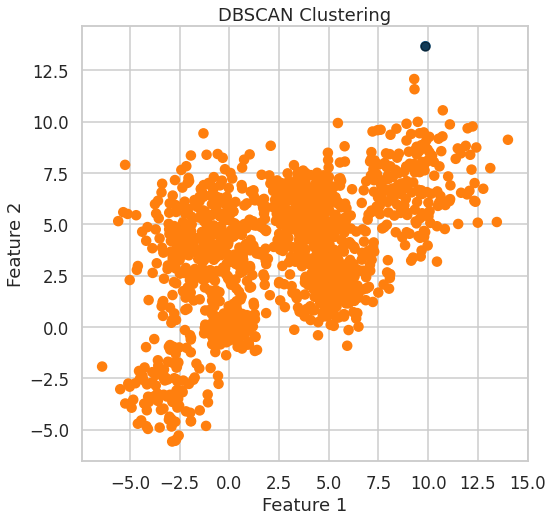

Total number of clusters: 1


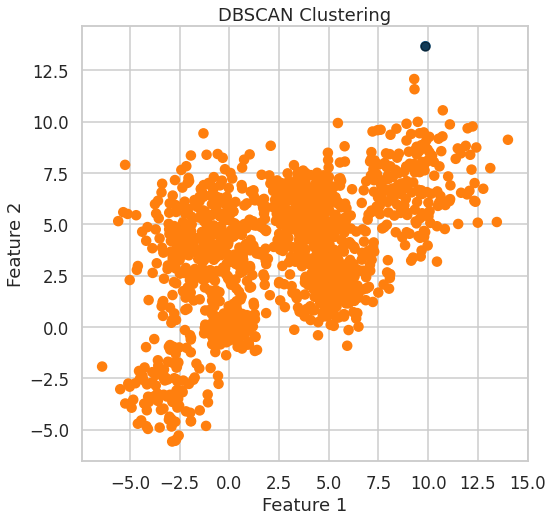

Total number of clusters: 0


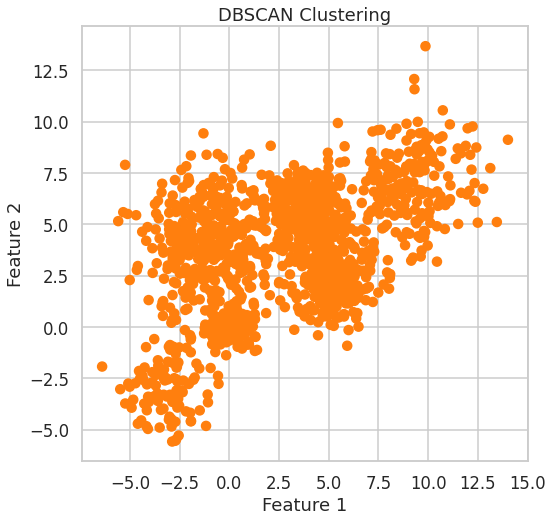

Total number of clusters: 0


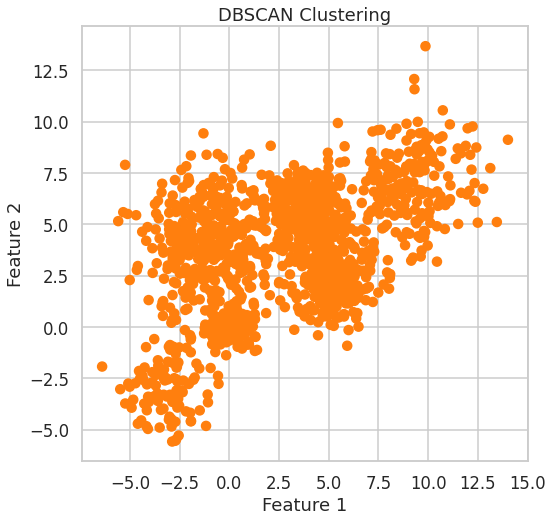

Total number of clusters: 0


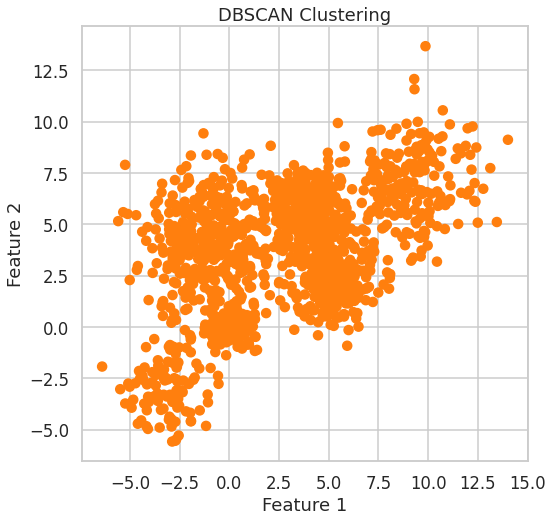

Total number of clusters: 0


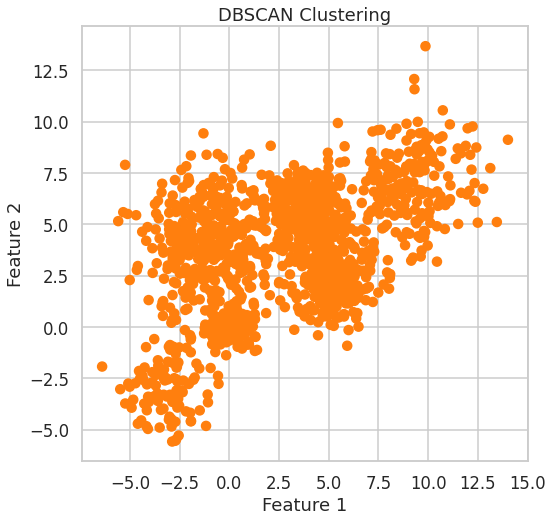

Total number of clusters: 1


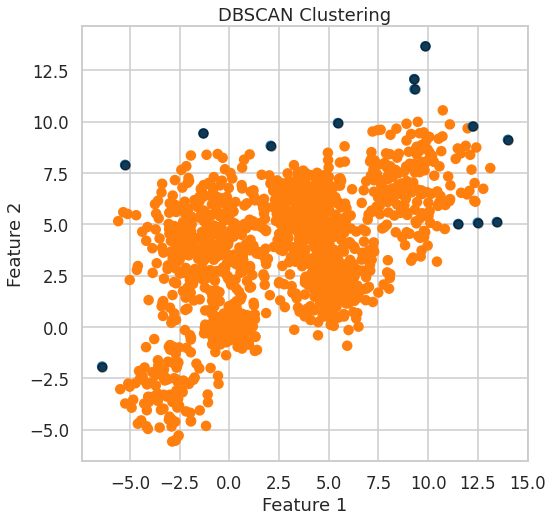

Total number of clusters: 1


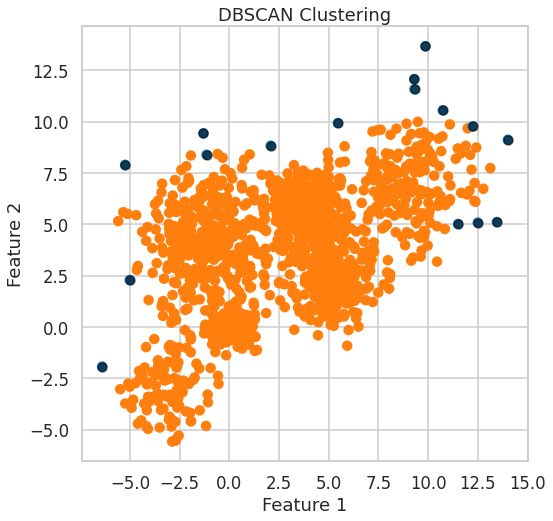

Total number of clusters: 1


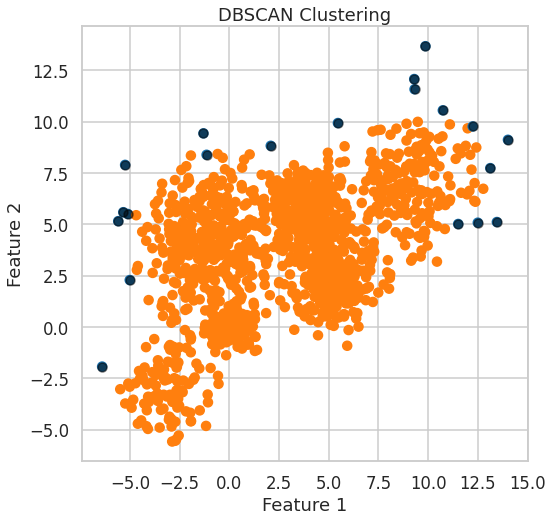

Total number of clusters: 1


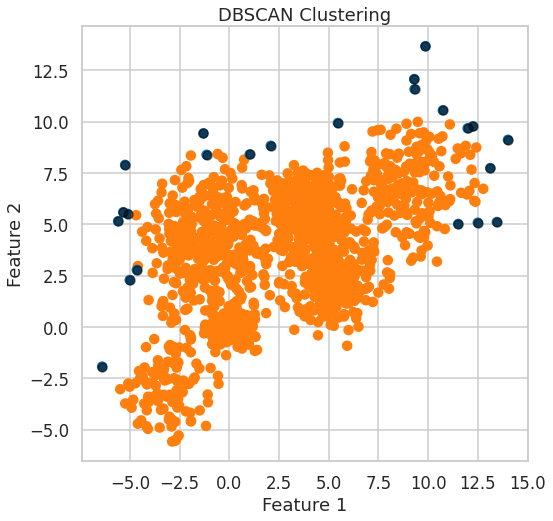

Total number of clusters: 1


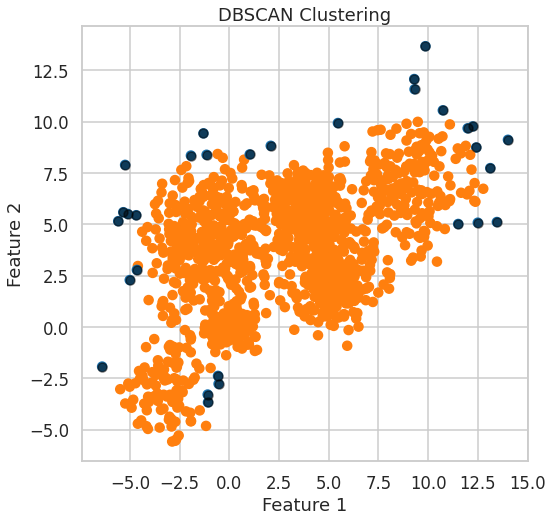

Total number of clusters: 1


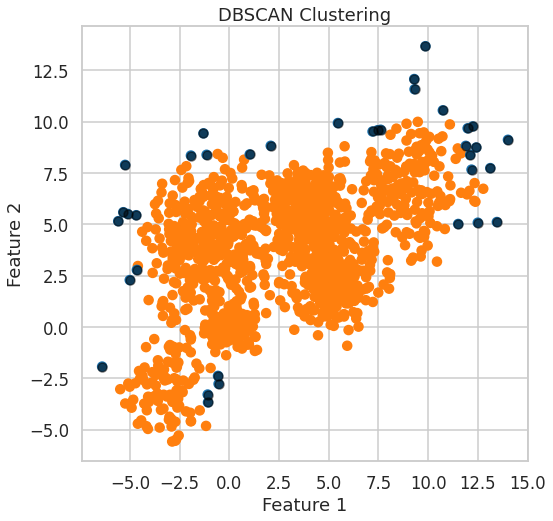

Total number of clusters: 1


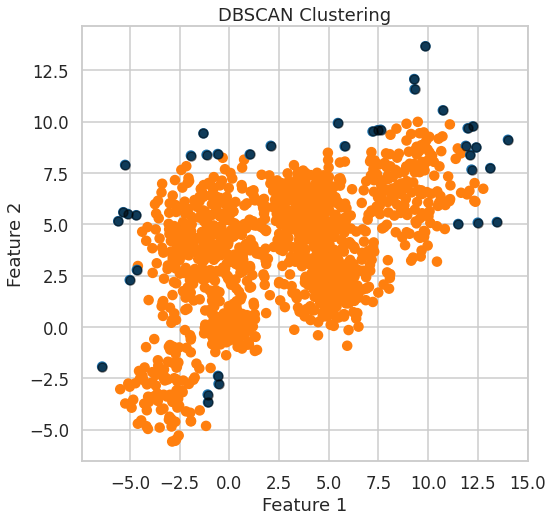

Total number of clusters: 1


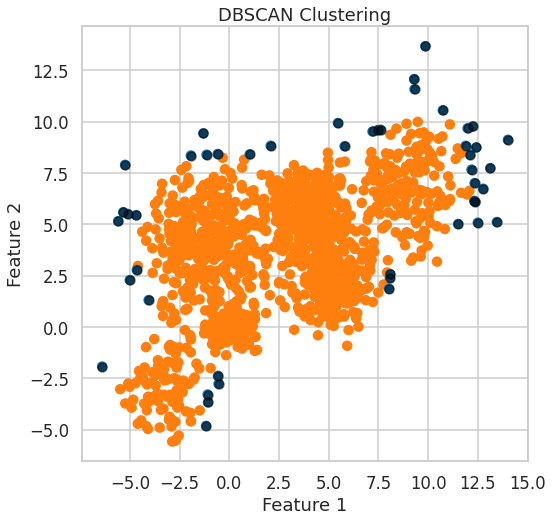

Total number of clusters: 2


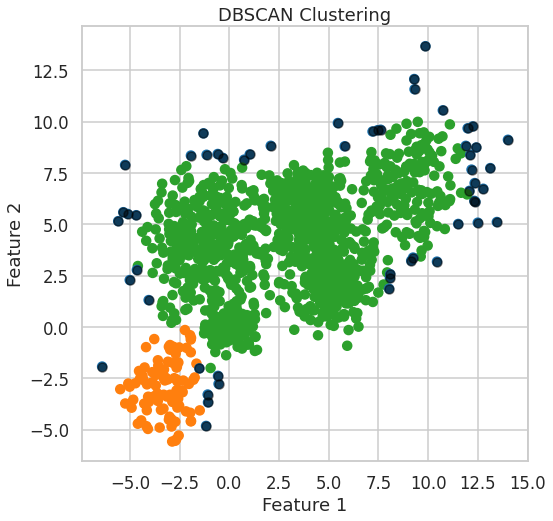

Total number of clusters: 2


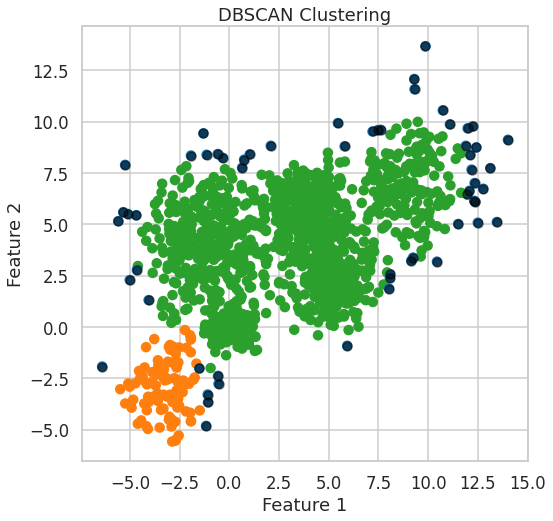

Total number of clusters: 2


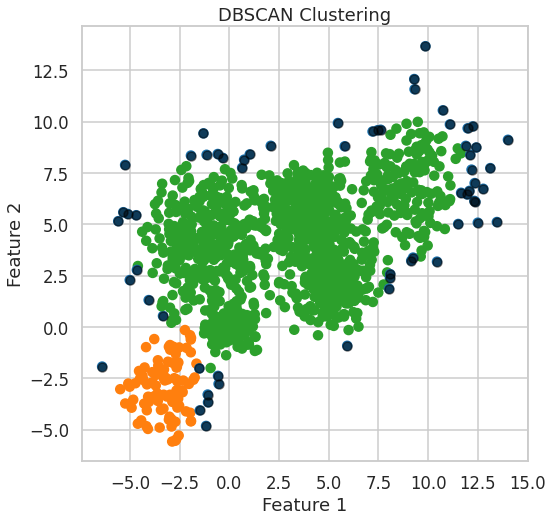

Total number of clusters: 2


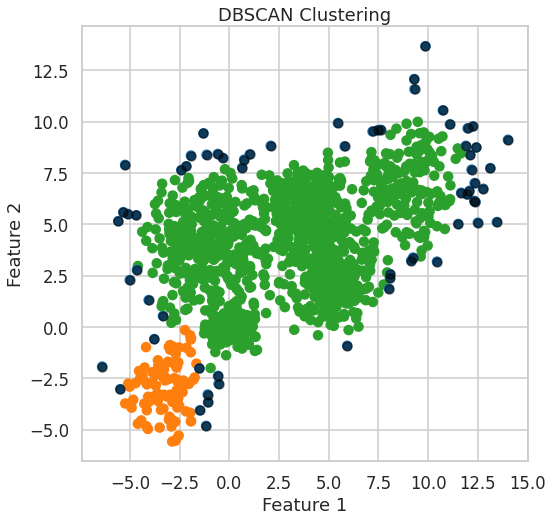

Total number of clusters: 2


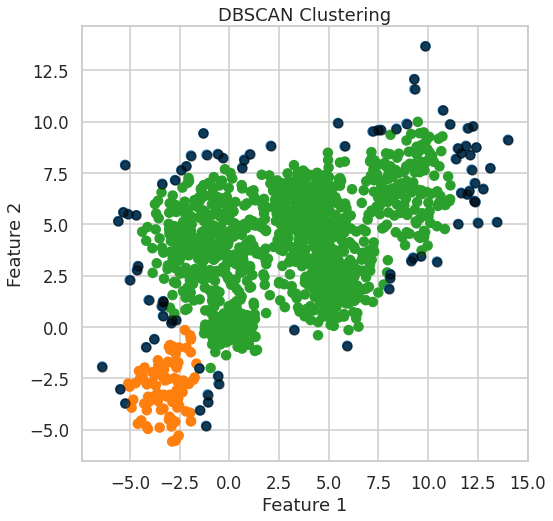

Total number of clusters: 2


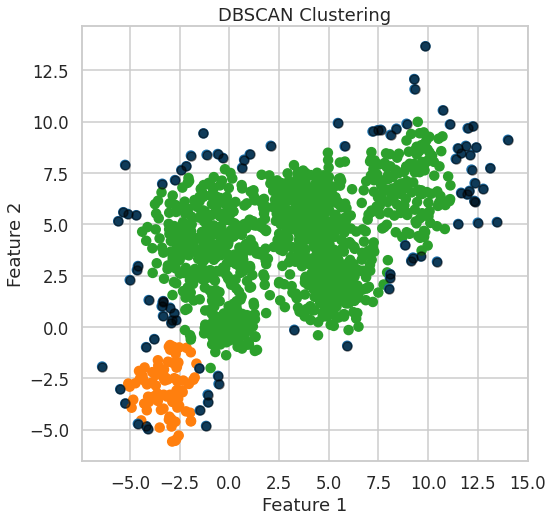

Total number of clusters: 3


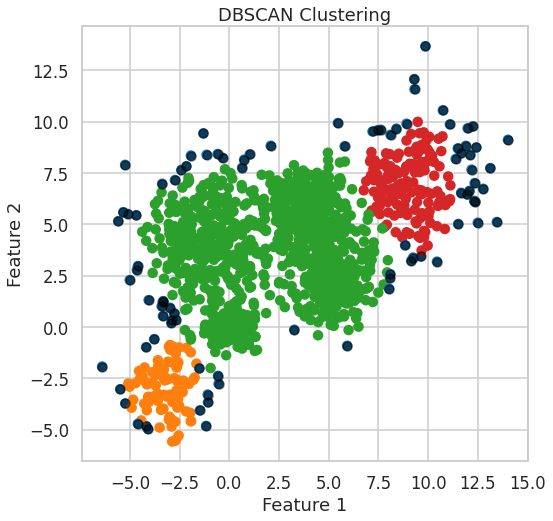

Total number of clusters: 3


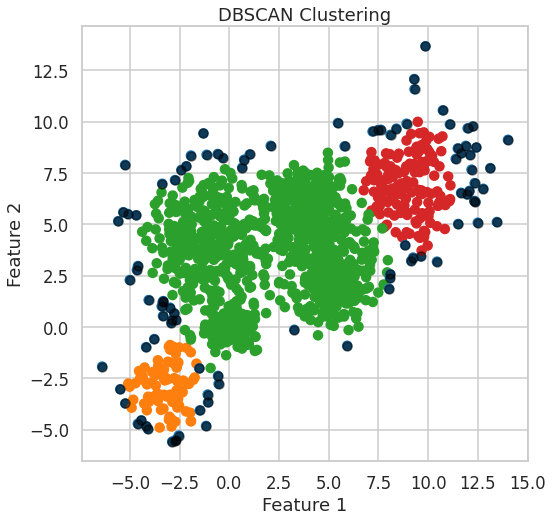

Total number of clusters: 3


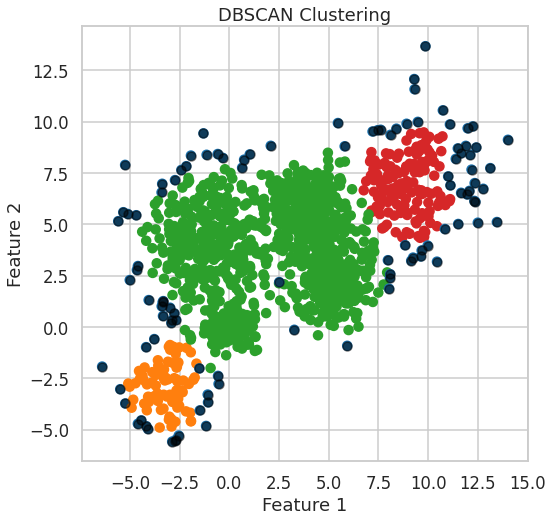

Total number of clusters: 3


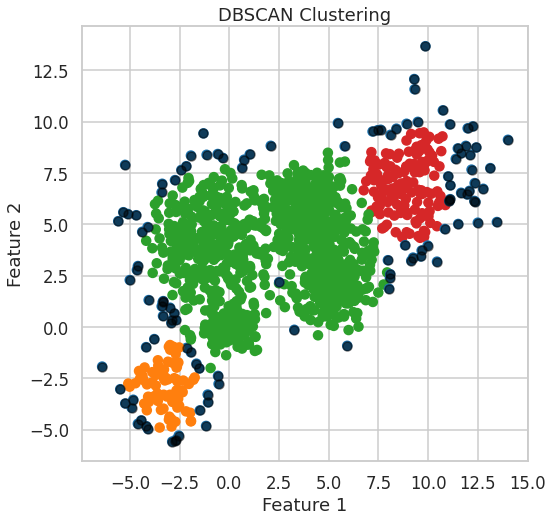

Total number of clusters: 3


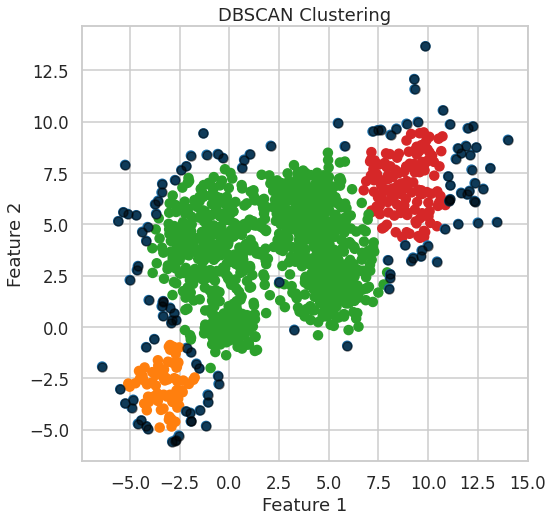

Total number of clusters: 3


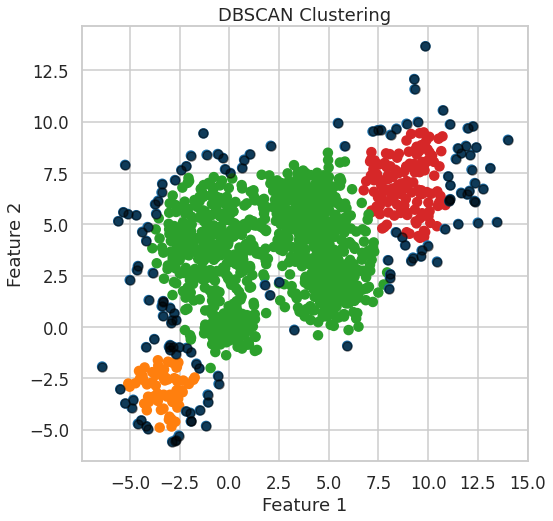

Text(0, 0.5, 'Silhouette score')

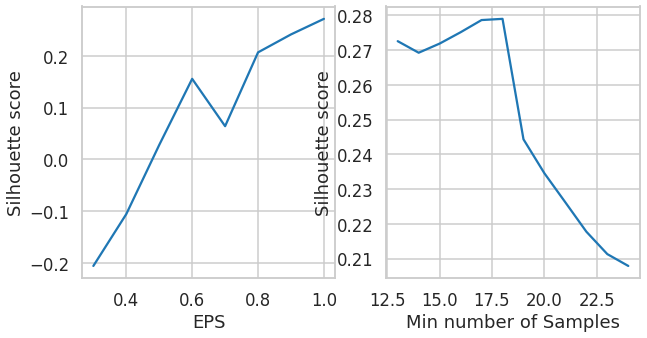

In [92]:
# Initialize empty lists to store silhouette scores and parameter values
silhouette_eps = []
eps_values = []
silhouette_min_samples = []
min_samples_values = []

for eps in range(1, 30):
    eps_value = eps * 0.1
    dbscan_model = DBSCAN(eps=eps_value, min_samples=15, metric='euclidean')
    dbscan_model.fit(Multi_blob_Data)
    labels = dbscan_model.labels_
    n_clusters = len(np.unique(labels)) - 1
    print(f"Total number of clusters: {n_clusters}")

    if n_clusters > 1:
        eps_values.append(eps_value)
        silhouette_score_eps = silhouette_score(Multi_blob_Data, labels)
        silhouette_eps.append(silhouette_score_eps)

    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='tab10', vmin=-1, vmax=9)
    plt.scatter(Multi_blob_Data[labels == -1, 0], Multi_blob_Data[labels == -1, 1], c='k', alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('DBSCAN Clustering')
    plt.show()

for min_samples in range(5, 25):

    dbscan_model = DBSCAN(eps=1, min_samples=min_samples, metric='euclidean')
    dbscan_model.fit(Multi_blob_Data)
    labels = dbscan_model.labels_
    n_clusters = len(np.unique(labels)) - 1
    print(f"Total number of clusters: {n_clusters}")

    if n_clusters > 1:
        min_samples_values.append(min_samples)
        silhouette_score_min_samples = silhouette_score(Multi_blob_Data, labels)
        silhouette_min_samples.append(silhouette_score_min_samples)

    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='tab10', vmin=-1, vmax=9)
    plt.scatter(Multi_blob_Data[labels == -1, 0], Multi_blob_Data[labels == -1, 1], c='k', alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('DBSCAN Clustering')
    plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(eps_values, silhouette_eps)
ax1.set_xlabel('EPS')
ax1.set_ylabel('Silhouette score')
ax2.plot(min_samples_values, silhouette_min_samples)
ax2.set_xlabel('Min number of Samples')
ax2.set_ylabel('Silhouette score')



### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

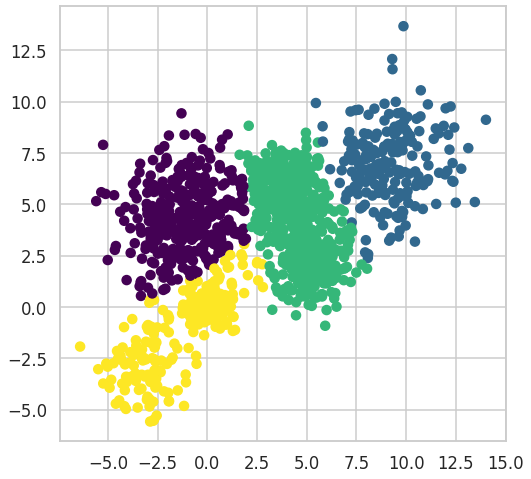

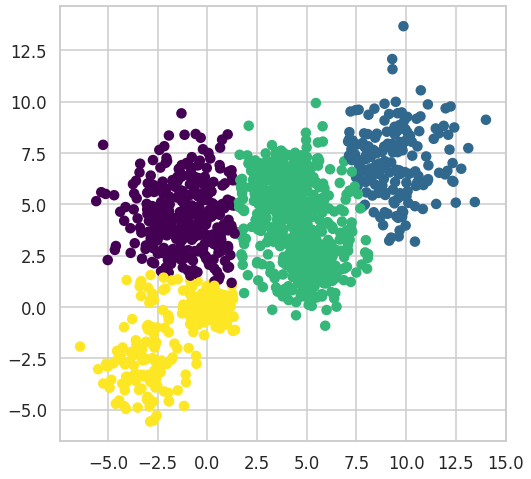

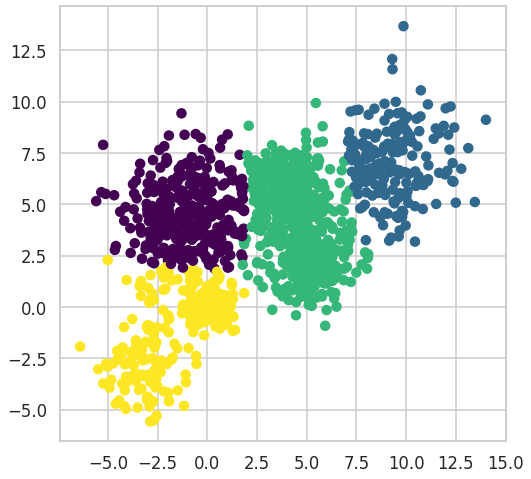

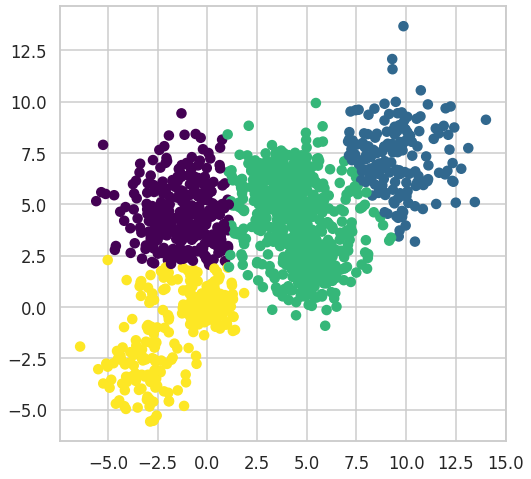

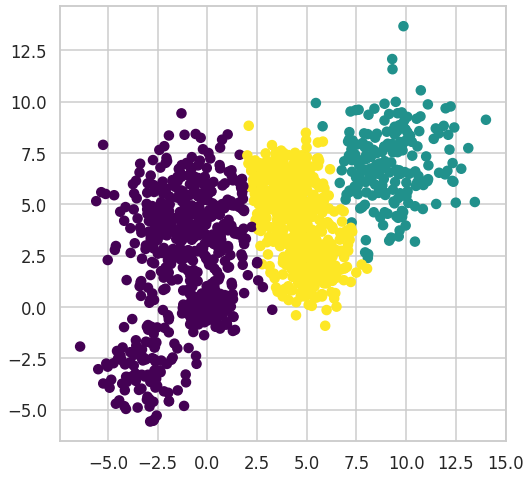

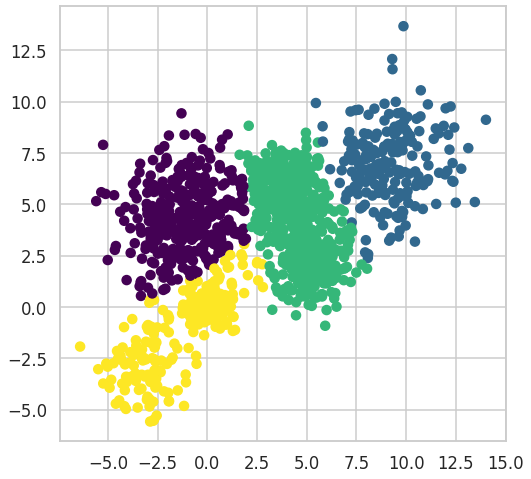

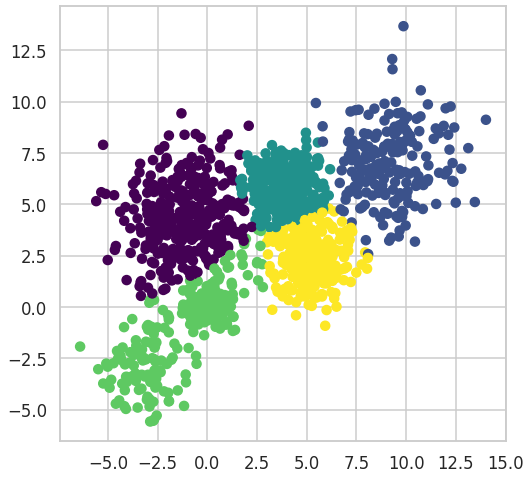

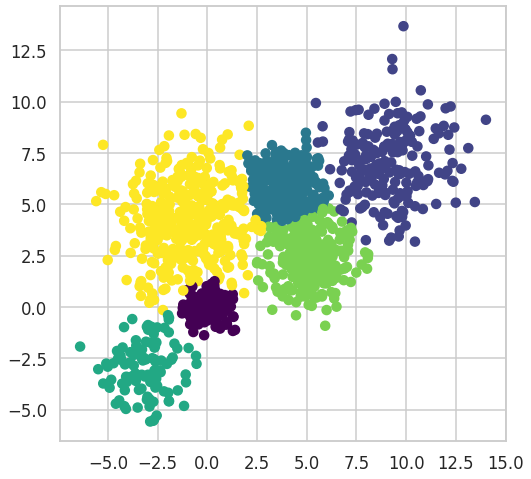

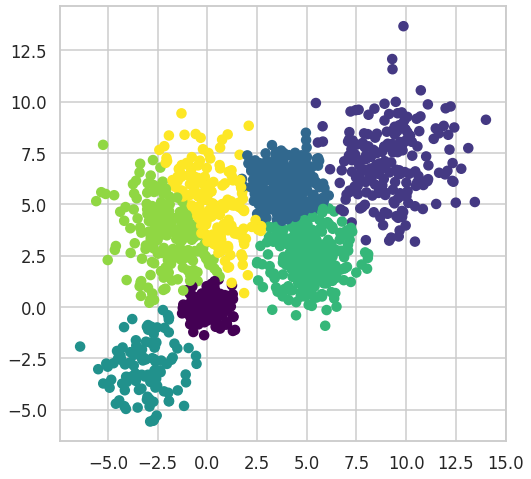

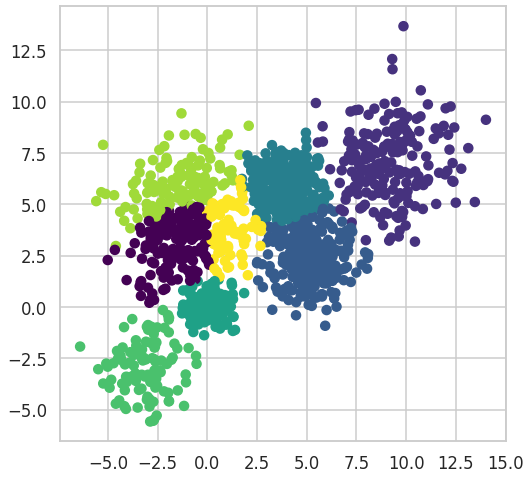

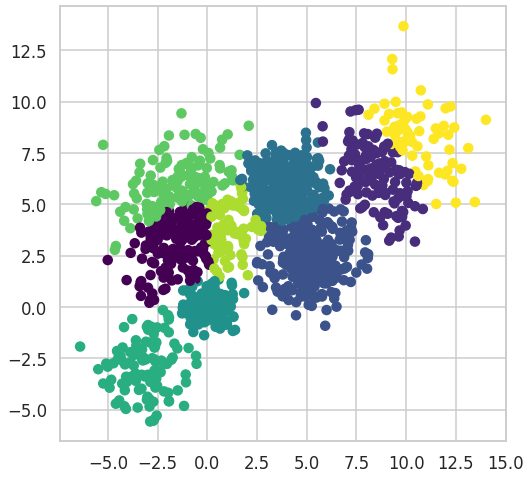

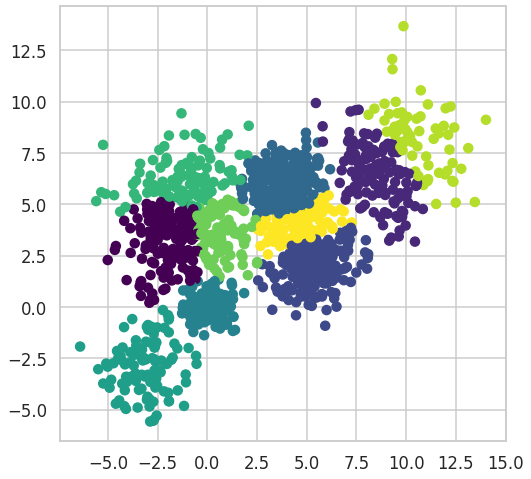

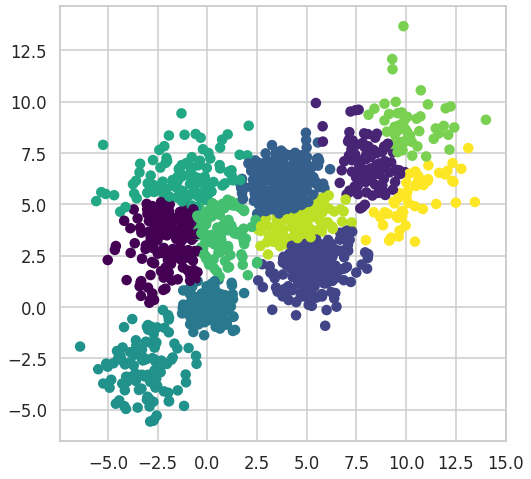

In [93]:
cov_types = ['full', 'tied', 'diag', 'spherical']
silhouette_scores = {}
for cov_type in cov_types:
    gm = GaussianMixture(n_components=4, covariance_type=cov_type, random_state=0)
    gm.fit(Multi_blob_Data)
    labels = gm.predict(Multi_blob_Data)
    n_clusters = len(np.unique(labels)) - 1
    if n_clusters > 1:
        silhouette_scores[cov_type] = silhouette_score(Multi_blob_Data, labels)
        plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
        plt.show()

n_clusters = range(2, 12)
silhouette_scores_n = []
for n in n_clusters:
    gm = GaussianMixture(n_components=n, covariance_type='full', random_state=0)
    gm.fit(Multi_blob_Data)
    labels = gm.predict(Multi_blob_Data)
    n_clusters = len(np.unique(labels)) - 1
    if n_clusters > 1:
        silhouette_scores_n.append(silhouette_score(Multi_blob_Data, labels))
        plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
        plt.show()


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [94]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 